# Session 4 : Reconstruction of W mass from leptonic decays

## Welcome to the Session 4 !

$W$ bosons are produced abudantly at the LHC and the measurements of the inclusive production cross section of the $W$ bosons and of the asymmetry between the $W^+$ and $W^-$ cross sections constitute important tests of the SM. In addition, W+jets processes are a significant background to studies of SM processes such as single-top production, top-quark pair ($t\bar{t}$) as well as searches for the SM Higgs boson and for BSM physics.

The analysis presented is focused on implementing the selection criteria for $W^{\pm}\rightarrow\ell^{\pm}\nu$ leptonic decays (with $\ell = e$ or $\mu$), and the selection is loosely based on the W-boson production cross-section measurement carried out with early $\sqrt{s}$ = 13 TeV **Real Data** with the ATLAS detector.

Example of a W boson decaying to an electron and a neutrino:
<img src="https://atlas.physicsmasterclasses.org/zpath_files/img/highslide/feynman/Wminus_Elektron.png" width="500" />

The difficulty of reconstucting the $W$ boson that decays into two leptons is the **unknown neutrino momentum vector**. The only observable that can be measured in a hadron collider is the missing transverse energy $\not\!\!E_T$$^*$. Besides, the direction of $\not\!\!E_T$ in the $x, y$-plane can be recontructed.

In good approximation, the $\not\!\!E_T$ can be considered to be the transverse energy of the neutrino.

$^*$_The missing transverse momentum in the event is defined as the negative vector sum of the $p_T$ of reconstructed and calibrated objects in the event._

## Event selection criteria and mass calculation

### Selection criteria
To initiate the reconstruction of the transverse mass of the W boson, the standard selection criteria to consider are:

**1. Single-electron or single-muon trigger satisfied**

**2. Exactly one light lepton (electron or muon) with $p_T$ > 35 GeV** <br>
**<font color='red'>Question</font>: Why such a $p_T$ threshold is important in our case?**

**3. Missing transverse momentum larger than 30 GeV**

**4. Additional requirements should be placed on the calorimeter$^{**}$ and tracking$^{***}$ isolation of electrons and muons: <font color='red'>< 0.1 for both</font>**<br>
     **<font color='red'>Question</font>: What is the purpose of the calorimeter and tracking isolation criteria?**

$^{**}$_The calorimeter isolation is computed as the sum of the energies of calorimeter energy clusters in a cone of size $\Delta R$=0.2 around the object._

$^{***}$_The track isolation is defined as the scalar sum of the $p_T$ of tracks within a cone of size $\Delta R$=0.3 around the object._
    
<u>Refer to the comprehensive table of ROOT branches and variables to determine which variables correspond to those used in the selection criteria</u>:

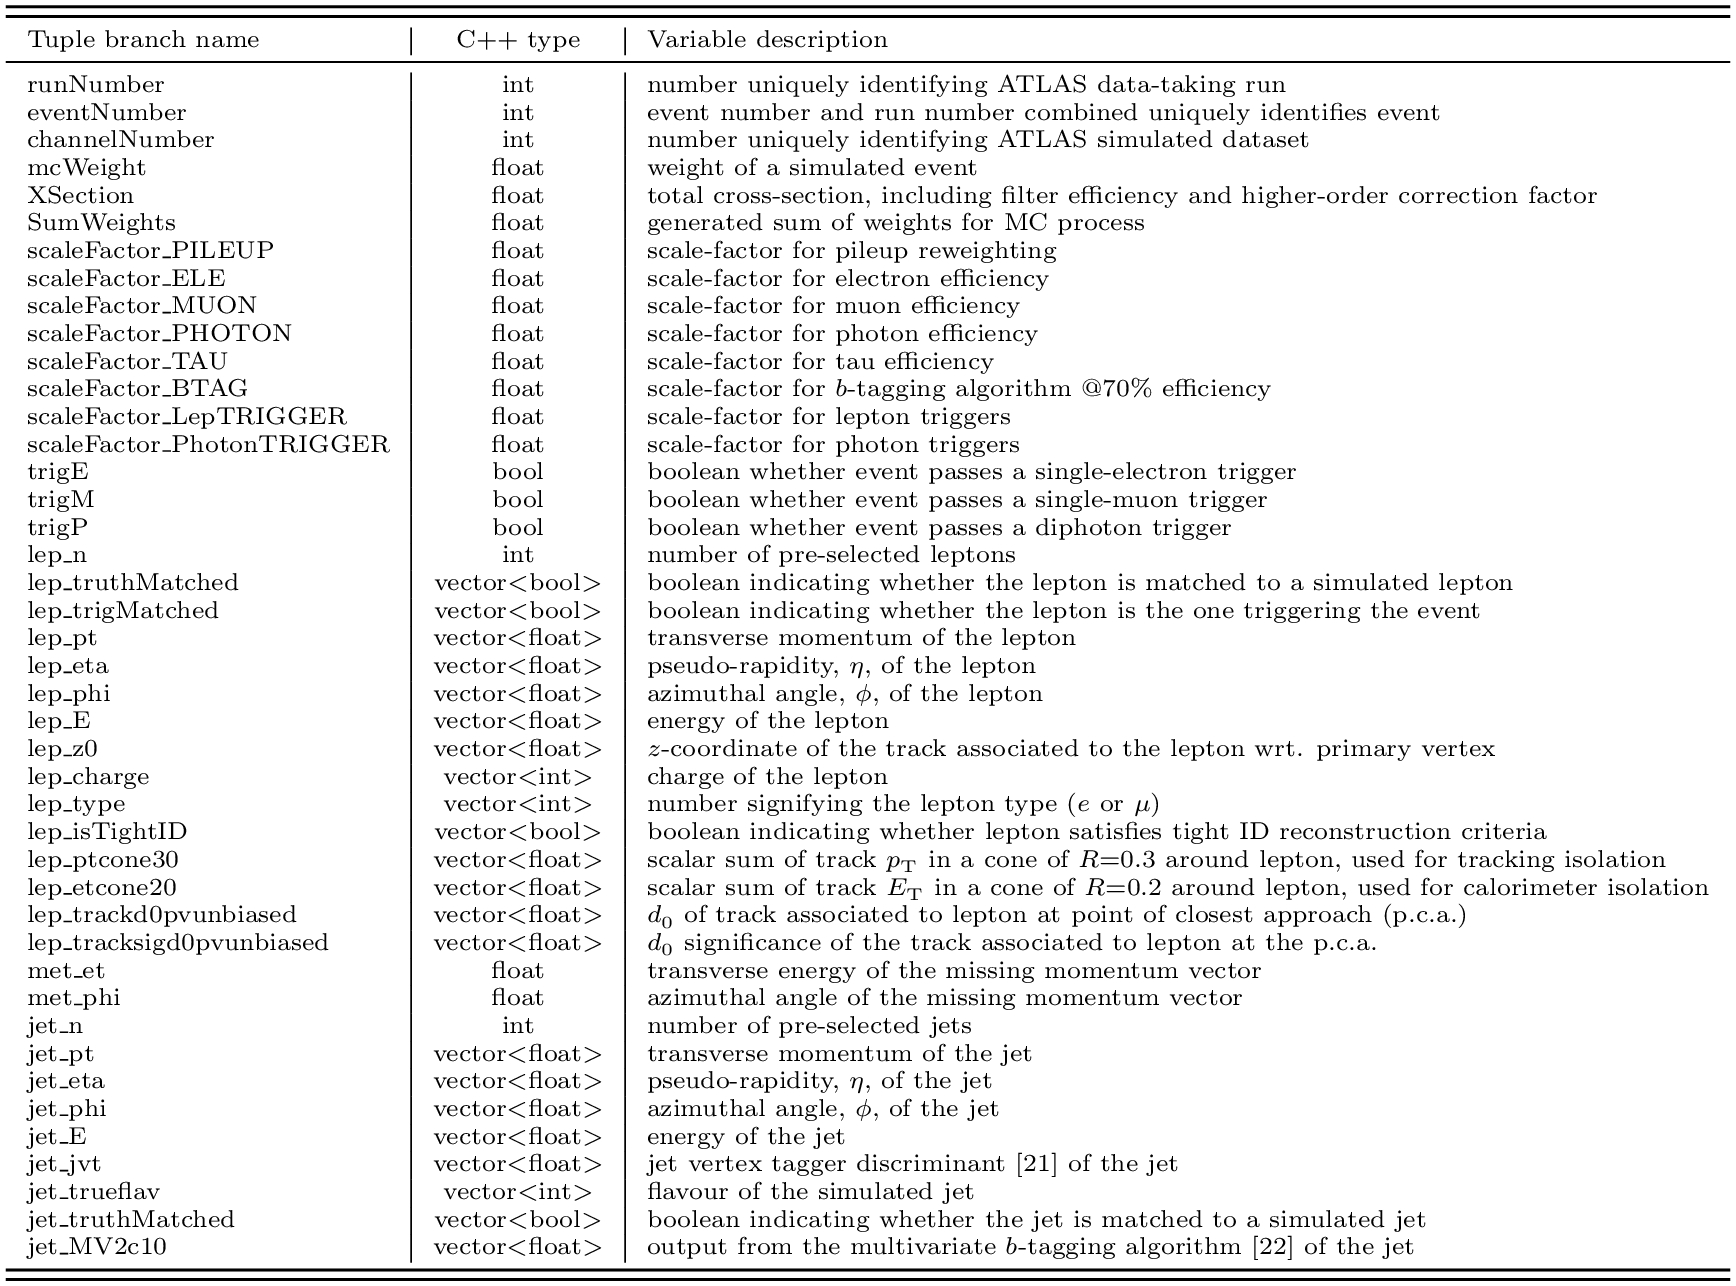

### W transverse mass calculation

The formula to calculate the transverse mass of the W boson is as follows:

$M_T^W = \sqrt{2p_{T}^{\ell}\not\!\!E_T(1-\cos \Delta\phi)}$

where $p_{T}^{\ell}$ is the transverse momentum of the lepton and $\Delta \phi$ is the azimuthal angle separation between the lepton and the direction of the missing transverse momentum.

**<font color='red'>Homework</font>: Investigate/understand why the transverse mass of the W gets this formula**

In [ ]:
import ROOT
from ROOT import TMath
import math

%jsroot on

In [ ]:
filename = "data_A.1lep.root"
url = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1lep/Data/"
f = ROOT.TFile.Open(url+filename)

In [ ]:
canvas = ROOT.TCanvas("Canvas", "c", 800, 600)

#### Make Stacked histograms
A stacked histogram is a type of histogram that displays multiple datases stacked on top of each other, allowing for visual comparison of the contributions of each dataset/different types of particles etc to the total distribution. The main procedure to create this using PyROOT is showing to the following cell:

In [ ]:
# Define a stacked histogram with a title and axis labels
hist_stack = ROOT.THStack("stacked","Transverse mass of the W boson; mass [GeV]; events")

# Define histograms for the transverse mass of Ws decaying to electrons, muons (and taus) with a title, axis labels, and fill color

hist_enu = ROOT.TH1F("enu","Transverse mass of the W boson; mass [GeV]; events",100,-0.5,200.5)
hist_enu.SetFillColor(2) # More color options: https://root.cern.ch/doc/master/classTAttFill.html

hist_munu = ROOT.TH1F("munu","Transverse mass of the W boson; mass [GeV]; events",100,-0.5,200.5)
hist_munu.SetFillColor(3)

hist_taunu = ROOT.TH1F("taunu","Transverse mass of the W boson; mass [GeV]; events",100,-0.5,200.5)
hist_taunu.SetFillColor(4)

In [ ]:
tree = f.Get("mini")
print(f"Number of entries: {tree.GetEntries()}")

In [ ]:
counter = 0
   
# Define a function for the event selection
def event_selection(tree, hist_enu, hist_munu, hist_taunu):
    counter = 0
    for event in tree:
        counter += 1
        if counter > 2000000: # Require any other value to increase or decrease the number of events to be processed
            break
        if (): # Ensure that the event satisfies the requirement of having exactly one lepton
            
            # Make Event selection:
            #1) Trigger fires electron or muon,
            #2) lep pT and MET thresholds,
            #3) Requirements for calorimeter and track isolation
                        
                        #Calculate the transverse mass of the W boson
                        M_WT = # Fill this line appropriately

                        if M_WT > 0:
                            # Call the function that fills the histograms
                            fill_histograms(tree, hist_enu, hist_munu, hist_taunu, M_WT)

# Define a function to fill the histograms
def fill_histograms(tree, hist_enu, hist_munu, hist_taunu, M_WT):
    if (): # Condition the lepton to be electron. Hint: You will find the pdgIDs for every particle here: https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf
           # Hint2: For the antiparticle the pdgID gets negative values
        hist_enu.Fill(M_WT / 1000)

    if (): # Condition the lepton to be muon.
        hist_munu.Fill(M_WT / 1000)

    if (): # Condition the lepton to be tau (probably not necessary for this analysis. Can you check?)
        hist_taunu.Fill(M_WT / 1000)

# Call the main function

# Add the histograms for each channel to the stacked histogram
hist_stack.Add(hist_enu)
hist_stack.Add(hist_munu)
hist_stack.Add(hist_taunu)
hist_stack.Draw("")

In [ ]:
canvas.Draw("hist")
legend = ROOT.TLegend(1.0,1.0,1.0,1.0)
legend.AddEntry(hist_munu, "W #rightarrow #mu+#nu")
legend.AddEntry(hist_enu, "W #rightarrow e+#nu")
legend.Draw()

**<font color='red'>Task</font>: Think of ways to improve the mass reconstruction**

## Calculate the ratio (W$\rightarrow$ e+$\nu$)/(W$\rightarrow$ $\mu$+$\nu$)

This ratio referes to the relative frequencies at which W bosons decay into an electron and a neutrino and a muon and a neutrino.

This ratio is important in the study of particle physics because it provides information about the relative probabilities of these two decay modes, which in turn can shed light on the properties of the W boson and the fundamental interactions that govern its behavior.

The Standard Model of particle physics predicts that this ratio should be very close to 1 (1.01), meaning that the electron and muon decay modes should be equally likely. However, in experiments, the ratio is found to deviate slightly from this prediction.

**In order to calculate this ratio could take the number of events directly from the histograms by using the "Integral()" function. This function computes the integral of the histogram over all bins, including underflow and overflow bins (if any), and returns the result as a floating-point value.**

In [ ]:
#Calculate the ratio using the Integral() function from PyROOT
ratio = #Fill this line
print(f"Ratio (W->e+nu)/(W->mu+nu) from data is {ratio:.2f}, theoretical value is 1.01")

**<font color='red'>Question</font>: Interpret the results obtained and attempt to provide an explanation for any deviations from the theoretical predictions, if present.**

## Charge asymmetry of the W boson production at the LHC

At the LHC, both the $W^+$ and $W^-$ bosons are produced in collisions between high-energy protons. However, there is an observed asymmetry between the production rates of these two bosons. This asymmetry is caused by the fact that the proton beams at the LHC are made up of both positively and negatively charged protons. When a positively charged proton collides with a negatively charged proton, it can produce either a $W^+$ or $W^-$. However, the production rates of these two bosons are not equal.

**<font color='red'>Task</font>: Quantify this charge asymmetry of the W boson production, using the datase above**

**<font color='red'>Question</font>: Can you provide a physics-based explanation for this W boson charge assymetry in the proton-proton collisions at the LHC?**
